In [165]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [166]:
df_sample1 = pd.read_csv("Breast_Cancer_Augmented_Positive_Dataset_8k.csv")
df_sample1

,0,1,2,3,4,5,6,7,8,9,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
0,0.512804,0.058938,0.529435,0.070050,0.265008,0.027912,0.885629,0.316553,0.150481,0.259909,...,0.967715,0.038204,0.036946,0.037648,0.037300,0.038204,0.036946,0.037648,0.037300,1.0
1,0.543392,0.072460,0.357297,1.824225,0.011772,0.305774,0.442124,0.238234,0.404805,0.222462,...,0.973693,0.038753,0.040148,0.040421,0.038398,0.038753,0.040148,0.040421,0.038398,1.0
2,0.462972,0.023815,0.995784,0.411113,0.291706,0.221538,0.647339,0.891442,0.081914,0.127952,...,0.964691,0.043936,0.040705,0.041327,0.043020,0.043936,0.040705,0.041327,0.043020,1.0
3,0.614602,0.134259,0.112894,0.660946,0.099556,0.710268,0.784855,0.113133,0.261060,0.327604,...,0.982214,0.032544,0.031366,0.032945,0.032998,0.032544,0.031366,0.032945,0.032998,1.0
4,0.749940,0.061687,0.795646,0.744609,0.168979,0.680204,0.395964,0.259196,0.411569,0.161880,...,0.997227,0.021783,0.021543,0.021990,0.021696,0.021783,0.021543,0.021990,0.021696,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7815,0.649234,0.032202,0.160830,1.542416,0.286979,0.173201,0.634189,0.147836,0.376638,0.165056,...,0.995145,0.028403,0.027558,0.027746,0.027644,0.028403,0.027558,0.027746,0.027644,1.0
7816,0.198588,0.189913,0.593163,2.020908,0.071868,0.717029,0.311775,0.261614,0.335414,0.229683,...,0.977090,0.039669,0.040739,0.041195,0.039638,0.039669,0.040739,0.041195,0.039638,1.0
7817,0.335369,0.144272,0.238421,1.303674,0.579740,0.189792,0.779709,0.755286,0.638449,0.240480,...,0.960393,0.054801,0.057350,0.058956,0.054631,0.054801,0.057350,0.058956,0.054631,1.0
7818,0.504851,0.039228,0.283918,0.772767,0.015357,0.284417,0.383878,0.030593,0.200283,0.213998,...,0.957405,0.068200,0.068377,0.067482,0.065991,0.068200,0.068377,0.067482,0.065991,1.0


In [167]:
df_sample2 = pd.read_csv("Breast_Cancer_10k_2_Dataset.csv")
df_sample2

,0,1,2,3,4,5,6,7,8,9,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
0,0.185713,0.129328,0.151128,1.148885,0.355841,0.092020,0.641751,0.588707,0.371998,0.493291,...,0.956743,0.050902,0.053116,0.054807,0.050988,0.050902,0.053116,0.054807,0.050988,0.0
1,0.360726,0.373147,0.526488,0.537230,0.136993,0.089766,0.505770,0.140908,0.120453,0.137948,...,0.995146,0.025075,0.023461,0.021841,0.023263,0.025075,0.023461,0.021841,0.023263,0.0
2,0.157023,0.167137,0.237207,1.282194,0.121771,0.533974,0.293243,0.182768,0.672679,0.248403,...,0.973035,0.033974,0.034887,0.035874,0.034150,0.033974,0.034887,0.035874,0.034150,0.0
3,0.166641,0.767016,0.655124,1.818139,0.512169,0.010876,0.748262,0.146314,0.671473,0.196390,...,0.985751,0.030838,0.029879,0.031978,0.031594,0.030838,0.029879,0.031978,0.031594,0.0
4,0.111832,0.024164,0.259883,1.798461,0.196784,0.589911,0.254228,0.505094,0.795052,0.341958,...,0.995997,0.015538,0.015425,0.015983,0.015564,0.015538,0.015425,0.015983,0.015564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.215518,0.023180,0.034412,1.870273,1.148400,0.741835,0.962309,0.432459,0.227685,0.058556,...,0.976251,0.040627,0.041627,0.041772,0.039499,0.040627,0.041627,0.041772,0.039499,0.0
9996,0.744583,0.083952,0.237501,1.808680,0.223173,0.336731,0.729377,0.256534,0.373716,0.150315,...,0.966343,0.039391,0.037296,0.036356,0.037387,0.039391,0.037296,0.036356,0.037387,0.0
9997,1.200996,0.011994,0.161329,0.846234,0.154310,0.213440,0.589500,0.088370,0.261969,0.466251,...,0.959386,0.047217,0.047710,0.051098,0.049133,0.047217,0.047710,0.051098,0.049133,0.0
9998,0.402526,1.326257,0.970394,1.177871,0.442189,0.288784,0.841492,0.825971,0.238176,0.207474,...,0.984141,0.025219,0.024221,0.024976,0.025639,0.025219,0.024221,0.024976,0.025639,0.0


In [168]:

df = pd.concat([df_sample1,df_sample2])
df

,0,1,2,3,4,5,6,7,8,9,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
0,0.512804,0.058938,0.529435,0.070050,0.265008,0.027912,0.885629,0.316553,0.150481,0.259909,...,0.967715,0.038204,0.036946,0.037648,0.037300,0.038204,0.036946,0.037648,0.037300,1.0
1,0.543392,0.072460,0.357297,1.824225,0.011772,0.305774,0.442124,0.238234,0.404805,0.222462,...,0.973693,0.038753,0.040148,0.040421,0.038398,0.038753,0.040148,0.040421,0.038398,1.0
2,0.462972,0.023815,0.995784,0.411113,0.291706,0.221538,0.647339,0.891442,0.081914,0.127952,...,0.964691,0.043936,0.040705,0.041327,0.043020,0.043936,0.040705,0.041327,0.043020,1.0
3,0.614602,0.134259,0.112894,0.660946,0.099556,0.710268,0.784855,0.113133,0.261060,0.327604,...,0.982214,0.032544,0.031366,0.032945,0.032998,0.032544,0.031366,0.032945,0.032998,1.0
4,0.749940,0.061687,0.795646,0.744609,0.168979,0.680204,0.395964,0.259196,0.411569,0.161880,...,0.997227,0.021783,0.021543,0.021990,0.021696,0.021783,0.021543,0.021990,0.021696,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.215518,0.023180,0.034412,1.870273,1.148400,0.741835,0.962309,0.432459,0.227685,0.058556,...,0.976251,0.040627,0.041627,0.041772,0.039499,0.040627,0.041627,0.041772,0.039499,0.0
9996,0.744583,0.083952,0.237501,1.808680,0.223173,0.336731,0.729377,0.256534,0.373716,0.150315,...,0.966343,0.039391,0.037296,0.036356,0.037387,0.039391,0.037296,0.036356,0.037387,0.0
9997,1.200996,0.011994,0.161329,0.846234,0.154310,0.213440,0.589500,0.088370,0.261969,0.466251,...,0.959386,0.047217,0.047710,0.051098,0.049133,0.047217,0.047710,0.051098,0.049133,0.0
9998,0.402526,1.326257,0.970394,1.177871,0.442189,0.288784,0.841492,0.825971,0.238176,0.207474,...,0.984141,0.025219,0.024221,0.024976,0.025639,0.025219,0.024221,0.024976,0.025639,0.0


In [169]:
df = df.drop(['2048', '2049', '2050','2051','2052','2053'], axis=1)
df = df.dropna()
df = df[df['2102'] != 2102.0]

In [170]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [171]:
X=df.drop("2102",axis=1)
Y=df["2102"]

In [172]:
from sklearn.model_selection import StratifiedShuffleSplit

In [173]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(X, Y)

5

In [174]:
a=sss.split(X,Y)

In [175]:
X=df.drop("2102",axis=1)
Y=df["2102"]
seed = 1
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2, random_state=1)

In [176]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.25, random_state=1)

In [177]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [178]:
y_preds_rf = random_forest.predict(X_test)

In [179]:
y_preds_rf

array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0.

In [180]:
random_forest.score(X_train, y_train)


1.0

In [181]:
random_forest.score(X_test, y_test)


0.8698092031425365

In [182]:
# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_recall = recall_score(y_test, y_preds_rf, pos_label=1)
negative_recall = recall_score(y_test, y_preds_rf, pos_label=0)

print("Positive Recall: {:.2f}".format(positive_recall*100))
print("Negative Recall: {:.2f}".format(negative_recall*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_precision = precision_score(y_test, y_preds_rf, pos_label=1)
negative_precision = precision_score(y_test, y_preds_rf, pos_label=0)

print("Positive Precision: {:.2f}".format(positive_precision*100))
print("Negative Precision: {:.2f}".format(negative_precision*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_f1 = f1_score(y_test, y_preds_rf, pos_label=1)
negative_f1 = f1_score(y_test, y_preds_rf, pos_label=0)

print("Positive F1-score: {:.2f}".format(positive_f1*100))
print("Negative F1-score: {:.2f}".format(negative_f1*100))

Positive Recall: 75.00
Negative Recall: 96.92
Positive Precision: 95.28
Negative Precision: 82.37
Positive F1-score: 83.93
Negative F1-score: 89.06


In [183]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score, precision_score


In [184]:
acc_rf = accuracy_score(y_test,y_preds_rf)
print('Accuracy of the model: {0}%'.format(acc_rf))

Accuracy of the model: 0.8698092031425365%


In [185]:
f1_rf = f1_score(y_test,y_preds_rf)
print('F1 score of the model: {0}%'.format(f1_rf))

F1 score of the model: 0.8393351800554018%


In [186]:
rec_rf = recall_score(y_test,y_preds_rf)
print('Recall of the model: {0}%'.format(f1_rf))

Recall of the model: 0.8393351800554018%


In [187]:
pre_rf = precision_score(y_test,y_preds_rf)
print('Precision of the model: {0}%'.format(f1_rf))

Precision of the model: 0.8393351800554018%


In [188]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [189]:
log_reg.fit(X_train, y_train)


/home/toghrul/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [190]:
log_reg.score(X_test, y_test)


0.819304152637486

In [191]:
log_reg.score(X_train, y_train)


0.8822250280583613

In [192]:
y_preds_log_reg = log_reg.predict(X_test)


In [193]:
y_preds_log_reg


array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0.

In [194]:
# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_recall = recall_score(y_test, y_preds_log_reg, pos_label=1)
negative_recall = recall_score(y_test, y_preds_log_reg, pos_label=0)

print("Positive Recall: {:.2f}".format(positive_recall*100))
print("Negative Recall: {:.2f}".format(negative_recall*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_precision = precision_score(y_test, y_preds_log_reg, pos_label=1)
negative_precision = precision_score(y_test, y_preds_log_reg, pos_label=0)

print("Positive Precision: {:.2f}".format(positive_precision*100))
print("Negative Precision: {:.2f}".format(negative_precision*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_f1 = f1_score(y_test, y_preds_log_reg, pos_label=1)
negative_f1 = f1_score(y_test, y_preds_log_reg, pos_label=0)

print("Positive F1-score: {:.2f}".format(positive_f1*100))
print("Negative F1-score: {:.2f}".format(negative_f1*100))

Positive Recall: 73.76
Negative Recall: 88.71
Positive Precision: 84.42
Negative Precision: 80.30
Positive F1-score: 78.73
Negative F1-score: 84.29


In [195]:
acc_log_reg = accuracy_score(y_test,y_preds_log_reg)
print('Accuracy of the model: {0}%'.format(acc_log_reg))

Accuracy of the model: 0.819304152637486%


In [196]:
f1_log_reg = f1_score(y_test,y_preds_log_reg)
print('F1 score of the model: {0}%'.format(f1_log_reg))

F1 score of the model: 0.7873183619550859%


In [197]:
rec_log_reg = recall_score(y_test,y_preds_log_reg)
print('Recall of the model: {0}%'.format(rec_log_reg))

Recall of the model: 0.7376237623762376%


In [198]:
pre_log_reg = precision_score(y_test,y_preds_log_reg)
print('Precision of the model: {0}%'.format(pre_log_reg))

Precision of the model: 0.8441926345609065%


In [199]:
from sklearn.neighbors import KNeighborsClassifier


In [200]:
KNN = KNeighborsClassifier()


In [201]:
KNN.fit(X_train, y_train)


KNeighborsClassifier()

In [202]:
y_preds_knn = KNN.predict(X_test)


In [203]:
y_preds_knn


array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0.

In [204]:
# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_recall = recall_score(y_test, y_preds_knn, pos_label=1)
negative_recall = recall_score(y_test, y_preds_knn, pos_label=0)

print("Positive Recall: {:.2f}".format(positive_recall*100))
print("Negative Recall: {:.2f}".format(negative_recall*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_precision = precision_score(y_test, y_preds_knn, pos_label=1)
negative_precision = precision_score(y_test, y_preds_knn, pos_label=0)

print("Positive Precision: {:.2f}".format(positive_precision*100))
print("Negative Precision: {:.2f}".format(negative_precision*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_f1 = f1_score(y_test, y_preds_knn, pos_label=1)
negative_f1 = f1_score(y_test, y_preds_knn, pos_label=0)

print("Positive F1-score: {:.2f}".format(positive_f1*100))
print("Negative F1-score: {:.2f}".format(negative_f1*100))

Positive Recall: 75.50
Negative Recall: 88.91
Positive Precision: 84.96
Negative Precision: 81.39
Positive F1-score: 79.95
Negative F1-score: 84.99


In [205]:
KNN.score(X_train, y_train)


0.8920454545454546

In [206]:
KNN.score(X_test, y_test)


0.8282828282828283

In [207]:
acc_KNN = accuracy_score(y_test,y_preds_knn)
print('Accuracy of the model: {0}%'.format(acc_KNN))

Accuracy of the model: 0.8282828282828283%


In [208]:
f1_KNN = f1_score(y_test,y_preds_knn)
print('F1 score of the model: {0}%'.format(f1_KNN))

F1 score of the model: 0.799475753604194%


In [209]:
rec_KNN = recall_score(y_test,y_preds_knn)
print('Recall of the model: {0}%'.format(rec_KNN))

Recall of the model: 0.754950495049505%


In [210]:
pre_KNN = precision_score(y_test,y_preds_knn)
print('Precision of the model: {0}%'.format(pre_KNN))

Precision of the model: 0.8495821727019499%


In [211]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [212]:
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [213]:
y_preds_ds = decision_tree.predict(X_test)


In [214]:
y_preds_ds


array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0.

In [215]:
# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_recall = recall_score(y_test, y_preds_ds, pos_label=1)
negative_recall = recall_score(y_test, y_preds_ds, pos_label=0)

print("Positive Recall: {:.2f}".format(positive_recall*100))
print("Negative Recall: {:.2f}".format(negative_recall*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_precision = precision_score(y_test, y_preds_ds, pos_label=1)
negative_precision = precision_score(y_test, y_preds_ds, pos_label=0)

print("Positive Precision: {:.2f}".format(positive_precision*100))
print("Negative Precision: {:.2f}".format(negative_precision*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_f1 = f1_score(y_test, y_preds_ds, pos_label=1)
negative_f1 = f1_score(y_test, y_preds_ds, pos_label=0)

print("Positive F1-score: {:.2f}".format(positive_f1*100))
print("Negative F1-score: {:.2f}".format(negative_f1*100))

Positive Recall: 77.97
Negative Recall: 75.56
Positive Precision: 72.58
Negative Precision: 80.53
Positive F1-score: 75.18
Negative F1-score: 77.97


In [216]:
decision_tree.score(X_train, y_train)


1.0

In [217]:
decision_tree.score(X_test, y_test)


0.7665544332210998

In [218]:
acc_decision_tree = accuracy_score(y_test,y_preds_ds)
print('Accuracy of the model: {0}%'.format(acc_decision_tree))

Accuracy of the model: 0.7665544332210998%


In [219]:
f1_decision_tree = f1_score(y_test,y_preds_ds)
print('F1 score of the model: {0}%'.format(f1_decision_tree))

F1 score of the model: 0.7517899761336516%


In [220]:
rec_decision_tree = recall_score(y_test,y_preds_ds)
print('Recall of the model: {0}%'.format(rec_decision_tree))

Recall of the model: 0.7797029702970297%


In [221]:
pre_decision_tree = precision_score(y_test,y_preds_ds)
print('Precision of the model: {0}%'.format(pre_decision_tree))

Precision of the model: 0.7258064516129032%


In [222]:
from sklearn.svm import SVC, LinearSVC


In [223]:
svc = SVC()
linear_svm = LinearSVC()

In [224]:
svc.fit(X_train, y_train)


SVC()

In [225]:
linear_svm.fit(X_train, y_train)


/home/toghrul/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [226]:
svc.score(X_train, y_train)


0.8850308641975309

In [227]:
y_preds_svc = svc.predict(X_test)


In [228]:
y_preds_svc


array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [229]:
# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_recall = recall_score(y_test, y_preds_svc, pos_label=1)
negative_recall = recall_score(y_test, y_preds_svc, pos_label=0)

print("Positive Recall: {:.2f}".format(positive_recall*100))
print("Negative Recall: {:.2f}".format(negative_recall*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_precision = precision_score(y_test, y_preds_svc, pos_label=1)
negative_precision = precision_score(y_test, y_preds_svc, pos_label=0)

print("Positive Precision: {:.2f}".format(positive_precision*100))
print("Negative Precision: {:.2f}".format(negative_precision*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_f1 = f1_score(y_test, y_preds_svc, pos_label=1)
negative_f1 = f1_score(y_test, y_preds_svc, pos_label=0)

print("Positive F1-score: {:.2f}".format(positive_f1*100))
print("Negative F1-score: {:.2f}".format(negative_f1*100))

Positive Recall: 69.55
Negative Recall: 98.56
Positive Precision: 97.57
Negative Precision: 79.60
Positive F1-score: 81.21
Negative F1-score: 88.07


In [230]:
acc_svc = accuracy_score(y_test,y_preds_svc)
print('Accuracy of the model: {0}%'.format(acc_svc))

Accuracy of the model: 0.8540965207631874%


In [231]:
f1_svc = f1_score(y_test,y_preds_svc)
print('F1 score of the model: {0}%'.format(f1_svc))

F1 score of the model: 0.8121387283236994%


In [232]:
rec_svc = recall_score(y_test,y_preds_svc)
print('Recall score of the model: {0}%'.format(rec_svc))

Recall score of the model: 0.6955445544554455%


In [233]:
pre_svc = precision_score(y_test,y_preds_svc)
print('Precision of the model: {0}%'.format(pre_svc))

Precision of the model: 0.9756944444444444%


In [234]:
linear_svm.score(X_train, y_train)


0.8877665544332211

In [235]:
y_preds_linear_svc = linear_svm.predict(X_test)


In [236]:
y_preds_linear_svc


array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0.

In [237]:
acc_linear_svc = accuracy_score(y_test,y_preds_linear_svc)
print('Accuracy of the model: {0}%'.format(acc_linear_svc))

Accuracy of the model: 0.8305274971941639%


In [238]:
f1_linear_svc = f1_score(y_test,y_preds_linear_svc)
print('F1 score of the model: {0}%'.format(f1_linear_svc))

F1 score of the model: 0.7945578231292516%


In [239]:
rec_linear_svc = recall_score(y_test,y_preds_linear_svc)
print('Recall of the model: {0}%'.format(rec_linear_svc))

Recall of the model: 0.7227722772277227%


In [240]:
pre_linear_svc = precision_score(y_test,y_preds_linear_svc)
print('Precision of the model: {0}%'.format(pre_linear_svc))

Precision of the model: 0.8821752265861027%


In [241]:
Models = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'Logistic Regression', 'KNeighbour Clasifier',
              'Decision Tree', 'SVC', 'Linear SVC'],
    'Accuracy' : [acc_rf, acc_log_reg, acc_KNN, acc_decision_tree, acc_svc, acc_linear_svc],
    'Recall' : [rec_rf, rec_log_reg, rec_KNN, rec_decision_tree, rec_svc, rec_linear_svc],
    'Precision' : [pre_rf, pre_log_reg, pre_KNN, pre_decision_tree, pre_svc, pre_linear_svc],
    'F1 score' : [f1_rf, f1_log_reg, f1_KNN, f1_decision_tree, f1_svc, f1_linear_svc]
})
Models.sort_values(by = "F1 score", ascending = False)

,Model,Accuracy,Recall,Precision,F1 score
0,Random Forest Classifier,0.869809,0.750000,0.952830,0.839335
4,SVC,0.854097,0.695545,0.975694,0.812139
2,KNeighbour Clasifier,0.828283,0.754950,0.849582,0.799476
5,Linear SVC,0.830527,0.722772,0.882175,0.794558
1,Logistic Regression,0.819304,0.737624,0.844193,0.787318
3,Decision Tree,0.766554,0.779703,0.725806,0.751790


<AxesSubplot:>

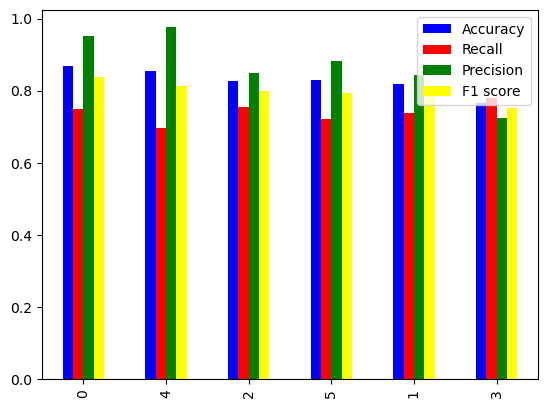

In [242]:
Models.sort_values(by = "F1 score", ascending = False).plot(kind = "bar", color = ["blue", 'red','green','yellow'])

In [243]:
df['0'] = df['0'].astype(float)

In [244]:
import xgboost as xgb

In [245]:
class_weight=int(y_train.value_counts()[0]/y_train.value_counts()[1])

In [246]:
XGBoost=xgb.XGBClassifier(scale_pos_weight=class_weight)

In [247]:
xgboost_param_grid={
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth'    :[1,2,3,4,5,6,7,8,9,10],
    'min_child_weight':[1,3,5,7],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5]
}

In [248]:
from sklearn.model_selection import RandomizedSearchCV

In [249]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold

In [250]:
kfold=StratifiedKFold(n_splits=5,shuffle=True)

In [251]:
gsXGoost=RandomizedSearchCV(estimator=XGBoost,param_distributions=xgboost_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)

In [252]:
gsXGoost.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           import...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                     

In [253]:
XGBOOST_best = gsXGoost.best_estimator_

# Best score
gsXGoost.best_score_

0.9167395399887157

In [254]:
prediction = XGBOOST_best.predict(X_test)
y_pred = prediction

In [255]:
# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_recall = recall_score(y_test, y_pred, pos_label=1)
negative_recall = recall_score(y_test, y_pred, pos_label=0)

print("Positive Recall: {:.2f}".format(positive_recall*100))
print("Negative Recall: {:.2f}".format(negative_recall*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_precision = precision_score(y_test, y_pred, pos_label=1)
negative_precision = precision_score(y_test, y_pred, pos_label=0)

print("Positive Precision: {:.2f}".format(positive_precision*100))
print("Negative Precision: {:.2f}".format(negative_precision*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_f1 = f1_score(y_test, y_pred, pos_label=1)
negative_f1 = f1_score(y_test, y_pred, pos_label=0)

print("Positive F1-score: {:.2f}".format(positive_f1*100))
print("Negative F1-score: {:.2f}".format(negative_f1*100))

Positive Recall: 79.95
Negative Recall: 95.48
Positive Precision: 93.62
Negative Precision: 85.16
Positive F1-score: 86.25
Negative F1-score: 90.03


In [256]:
metrics.accuracy_score(y_test, y_pred)

0.8843995510662177

In [257]:
metrics.f1_score(y_test, y_pred)

0.8624833110814419

In [258]:
acc_xgboost = accuracy_score(y_test,y_pred)
print('Accuracy of the model: {0}%'.format(acc_xgboost))

Accuracy of the model: 0.8843995510662177%


In [259]:
pre_xgboost = precision_score(y_test,y_pred)
print('Precision of the model: {0}%'.format(pre_xgboost))

Precision of the model: 0.936231884057971%


In [260]:
rec_xgboost = recall_score(y_test,y_pred)
print('Recall of the model: {0}%'.format(rec_xgboost))

Recall of the model: 0.7995049504950495%


In [261]:
f1_xgboost = f1_score(y_test,y_pred)
print('F1 score of the model: {0}%'.format(f1_xgboost))

F1 score of the model: 0.8624833110814419%


In [262]:
Models = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'Logistic Regression', 'KNeighbour Clasifier',
              'Decision Tree', 'SVC', 'XGBoost'],
    'Accuracy' : [acc_rf, acc_log_reg, acc_KNN, acc_decision_tree, acc_svc,acc_xgboost],
    'Recall' : [rec_rf, rec_log_reg, rec_KNN, rec_decision_tree, rec_svc,rec_xgboost],
    'Precision' : [pre_rf, pre_log_reg, pre_KNN, pre_decision_tree, pre_svc,pre_xgboost],
    'F1 score' : [f1_rf, f1_log_reg, f1_KNN, f1_decision_tree, f1_svc, f1_xgboost]
})
Models.sort_values(by = "F1 score", ascending = False)

,Model,Accuracy,Recall,Precision,F1 score
5,XGBoost,0.884400,0.799505,0.936232,0.862483
0,Random Forest Classifier,0.869809,0.750000,0.952830,0.839335
4,SVC,0.854097,0.695545,0.975694,0.812139
2,KNeighbour Clasifier,0.828283,0.754950,0.849582,0.799476
1,Logistic Regression,0.819304,0.737624,0.844193,0.787318
3,Decision Tree,0.766554,0.779703,0.725806,0.751790


<AxesSubplot:>

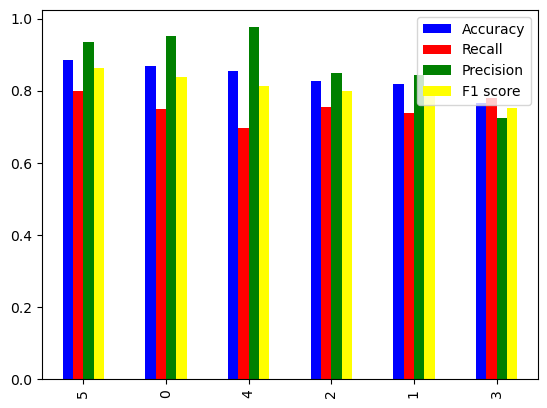

In [263]:
Models.sort_values(by = "F1 score", ascending = False).plot(kind = "bar", color = ["blue", 'red','green','yellow'])

In [264]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [265]:
# predict the results
y_pred=clf.predict(X_test)

In [266]:
# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_recall = recall_score(y_test, y_pred, pos_label=1)
negative_recall = recall_score(y_test, y_pred, pos_label=0)

print("Positive Recall: {:.2f}".format(positive_recall*100))
print("Negative Recall: {:.2f}".format(negative_recall*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_precision = precision_score(y_test, y_pred, pos_label=1)
negative_precision = precision_score(y_test, y_pred, pos_label=0)

print("Positive Precision: {:.2f}".format(positive_precision*100))
print("Negative Precision: {:.2f}".format(negative_precision*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_f1 = f1_score(y_test, y_pred, pos_label=1)
negative_f1 = f1_score(y_test, y_pred, pos_label=0)

print("Positive F1-score: {:.2f}".format(positive_f1*100))
print("Negative F1-score: {:.2f}".format(negative_f1*100))

Positive Recall: 76.98
Negative Recall: 95.07
Positive Precision: 92.84
Negative Precision: 83.27
Positive F1-score: 84.17
Negative F1-score: 88.78


In [267]:


# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))



LightGBM Model accuracy score: 0.8687


In [268]:


# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])



Confusion matrix

 [[463  24]
 [ 93 311]]

True Positives(TP) =  463

True Negatives(TN) =  311

False Positives(FP) =  24

False Negatives(FN) =  93


In [269]:


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       487
         1.0       0.93      0.77      0.84       404

    accuracy                           0.87       891
   macro avg       0.88      0.86      0.86       891
weighted avg       0.88      0.87      0.87       891



In [270]:
metrics.f1_score(y_test, y_pred)

0.8416779431664412

In [271]:
metrics.accuracy_score(y_test, y_pred)

0.8686868686868687

In [272]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [273]:
models = []
models.append(('xgb', gsXGoost))
models.append(('rfc', random_forest))
models.append(('lgb', clf))

# Create an ensemble model using the VotingClassifier
ensemble = VotingClassifier(models, voting='soft')

# Train the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Make predictions on the testing data using the ensemble model
y_pred = ensemble.predict(X_test)


In [274]:
print(y_pred)

[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.

In [275]:
y_pred_proba = ensemble.predict_proba(X_test)
print(y_pred_proba)

[[0.14870194 0.85129806]
 [0.91836975 0.08163025]
 [0.52222397 0.47777603]
 ...
 [0.77494918 0.22505083]
 [0.73839926 0.26160073]
 [0.81017139 0.18982861]]


In [276]:
# Evaluate the ensemble model's accuracy, f1 score, precision, and recall
ensemble_accuracy = accuracy_score(y_test, y_pred)
ensemble_f1_score = f1_score(y_test, y_pred)
ensemble_precision = precision_score(y_test, y_pred)
ensemble_recall = recall_score(y_test, y_pred)

# Print the evaluation results
print("Ensemble accuracy:", round(ensemble_accuracy*100,2))
print("Ensemble f1 score:", round(ensemble_f1_score*100,2))
print("Ensemble precision:", round(ensemble_precision*100,2))
print("Ensemble recall:", round(ensemble_recall*100,2))


Ensemble accuracy: 89.67
Ensemble f1 score: 87.53
Ensemble precision: 96.71
Ensemble recall: 79.95


In [277]:
# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_recall = recall_score(y_test, y_pred, pos_label=1)
negative_recall = recall_score(y_test, y_pred, pos_label=0)

print("Positive Recall: {:.2f}".format(positive_recall*100))
print("Negative Recall: {:.2f}".format(negative_recall*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_precision = precision_score(y_test, y_pred, pos_label=1)
negative_precision = precision_score(y_test, y_pred, pos_label=0)

print("Positive Precision: {:.2f}".format(positive_precision*100))
print("Negative Precision: {:.2f}".format(negative_precision*100))


# assuming y_true and y_pred are arrays of true and predicted labels, respectively
positive_f1 = f1_score(y_test, y_pred, pos_label=1)
negative_f1 = f1_score(y_test, y_pred, pos_label=0)

print("Positive F1-score: {:.2f}".format(positive_f1*100))
print("Negative F1-score: {:.2f}".format(negative_f1*100))

Positive Recall: 79.95
Negative Recall: 97.74
Positive Precision: 96.71
Negative Precision: 85.46
Positive F1-score: 87.53
Negative F1-score: 91.19


In [278]:
from sklearn import model_selection
import pickle

In [279]:
filename = 'finalized_model.sav'

In [280]:
pickle.dump(ensemble, open(filename, 'wb'))